In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

## Reading the data

In [2]:
#Reading the training data
train_df = pd.read_csv('train.csv')

#Reading the testing data
test_df = pd.read_csv('test.csv')


In [3]:
#Let's see the head of the training data
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
#Let's see the head of the testing data
test_df.head()
#We can notice that the price is not there as it is our job to predict it

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [5]:
#Let's see the shape of the train data
print('Train Data shape: ', train_df.shape)

#Let's see the shape of the test data
print('Test Data shape: ', test_df.shape)

Train Data shape:  (43152, 11)
Test Data shape:  (10788, 10)


In [6]:
#Let's see the info of the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
#Let's see the describtion of the train data
train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Checking for null data

In [8]:
#Let's see if we have null data
train_df.isna().sum()
#As we can see, we do not have null data in our dataset

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
#Let's see the columns in the train data
train_df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

## Id 

In [10]:
#We do not need the Id column as it will not give us any value, so I am going to drop it
train_df.drop(['Id'], axis=1, inplace=True)

### Checking for duplicated data

In [11]:
#Let's see if there is duplicated data
train_df.duplicated().sum()
#As we can see we have some duplicated data, so we have to drop them

97

In [12]:
#Let's drop the duplicated data
train_df.drop_duplicates(inplace=True)

In [13]:
#Let's check the shape of the data after dropping the duplicated data
train_df.shape

(43055, 10)

## carat

**Carat refers to the weight of the diamond, which is an important factor in determining its price.**

In [14]:
# Let's see the describtion 
carat_stats = train_df['carat'].describe()
print("Carat Statistics:")
print(carat_stats)

Carat Statistics:
count    43055.000000
mean         0.797752
std          0.473198
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64


In [15]:
carat_counts = train_df['carat'].value_counts().sum()
carat_counts

43055

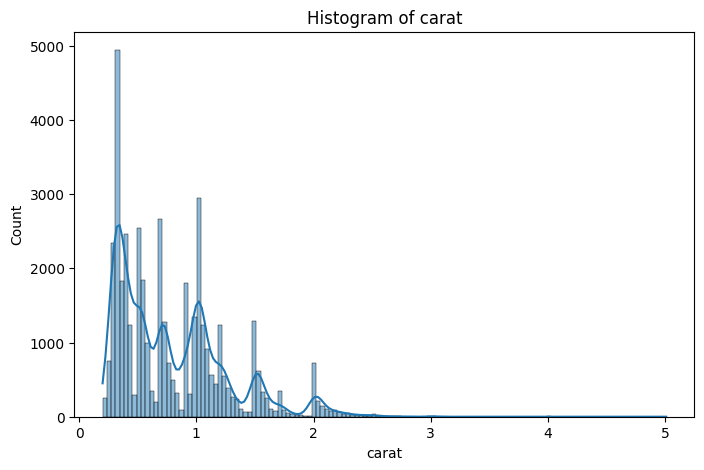

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='carat', kde=True)
plt.title(f"Histogram of {'carat'}")
plt.show()

## cut

**Cut refers to the quality of how the diamond is cut, affecting its brilliance and overall appearance.**

In [17]:
# Let's see the describtion 
cut_stats = train_df['cut'].describe()
print("Cut Statistics:")
print(cut_stats)

Cut Statistics:
count     43055
unique        5
top       Ideal
freq      17161
Name: cut, dtype: object


In [18]:
#Let's see the value counts of cut
cut_counts = train_df['cut'].value_counts()
print("\nCut Counts:")
print(cut_counts)


Cut Counts:
Ideal        17161
Premium      11080
Very Good     9651
Good          3874
Fair          1289
Name: cut, dtype: int64


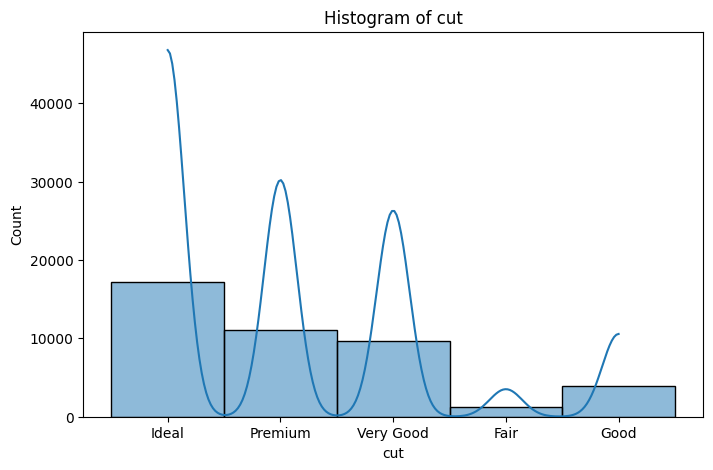

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='cut', kde=True)
plt.title(f"Histogram of {'cut'}")
plt.show()

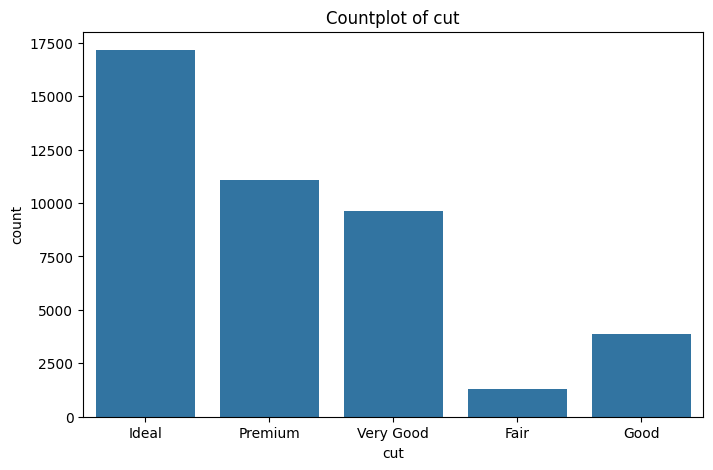

In [20]:

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='cut')
plt.title(f"Countplot of {'cut'}")
plt.show()

## color

**Color represents the diamond's color grade, ranging from D (colorless) to Z (light yellow or brown).**

In [21]:
# Let's see the describtion 
color_stats = train_df['color'].describe()
print("Color Statistics:")
print(color_stats)

Color Statistics:
count     43055
unique        7
top           G
freq       9042
Name: color, dtype: object


In [22]:
color_counts = train_df['color'].value_counts()
print("\nColor Counts:")
print(color_counts)


Color Counts:
G    9042
E    7817
F    7616
H    6629
D    5411
I    4254
J    2286
Name: color, dtype: int64


C:\Users\ziadz\AppData\Local\Temp\ipykernel_25000\1837301139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='color', palette='viridis')


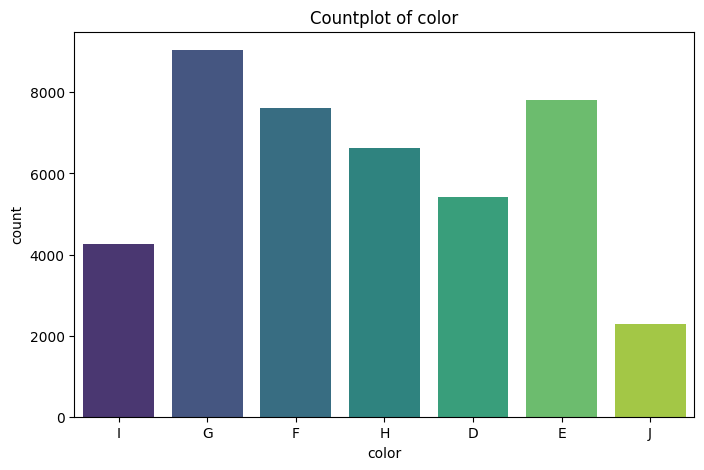

In [24]:
#Let's see the colors 
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='color', palette='viridis')
plt.title(f"Countplot of {'color'}")
plt.show()


## clarity

**Clarity refers to the presence of internal or external flaws in the diamond. It is usually graded on a scale from IF (internally flawless) to I3 (included).**

In [25]:
# Let's see the describtion 
clarity_stats = train_df['clarity'].describe()
print("Clarity Statistics:")
print(clarity_stats)

Clarity Statistics:
count     43055
unique        8
top         SI1
freq      10406
Name: clarity, dtype: object


In [26]:
clarity_counts = train_df['clarity'].value_counts()
print("\nClarity Counts:")
print(clarity_counts)


Clarity Counts:
SI1     10406
VS2      9806
SI2      7403
VS1      6465
VVS2     4031
VVS1     2899
IF       1440
I1        605
Name: clarity, dtype: int64


C:\Users\ziadz\AppData\Local\Temp\ipykernel_25000\4173934971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='clarity', palette='viridis')


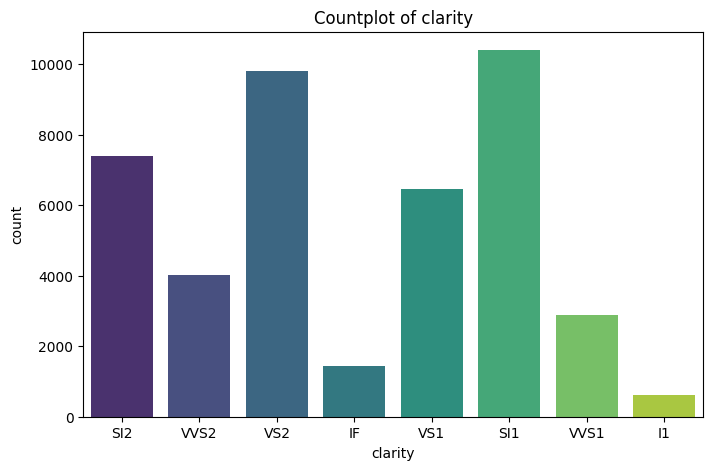

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='clarity', palette='viridis')
plt.title(f"Countplot of {'clarity'}")
plt.show()

## depth

**Depth represents the height of a diamond as a percentage of its diameter.**

In [29]:
# Let's see the describtion 
depth_stats = train_df['depth'].describe()
print("depth Statistics:")
print(depth_stats)

depth Statistics:
count    43055.000000
mean        61.746373
std          1.435066
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64


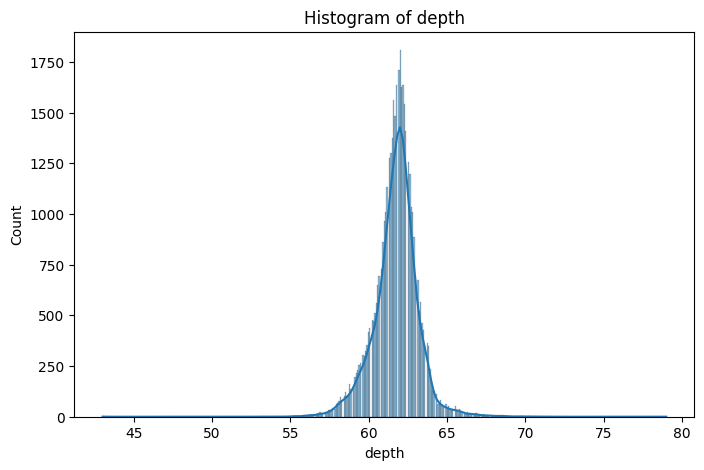

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='depth', kde=True)
plt.title(f"Histogram of {'depth'}")
plt.show()

## table

**Table refers to the width of the diamond's top facet as a percentage of its diameter.**

In [31]:
# Let's see the describtion 
table_stats = train_df['table'].describe()
print("Table Statistics:")
print(table_stats)

Table Statistics:
count    43055.000000
mean        57.459798
std          2.234325
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64


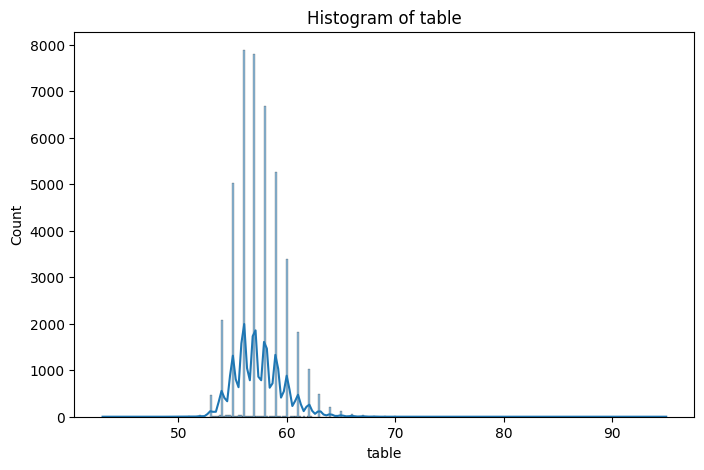

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='table', kde=True)
plt.title(f"Histogram of {'table'}")
plt.show()

## price

**This column contains the target variable, i.e., the price of the diamond.**

In [33]:
# Let's see the describtion 
price_stats = train_df['price'].describe()
print("Price Statistics:")
print(price_stats)

Price Statistics:
count    43055.000000
mean      3930.016235
std       3984.939986
min        326.000000
25%        948.000000
50%       2401.000000
75%       5312.500000
max      18823.000000
Name: price, dtype: float64


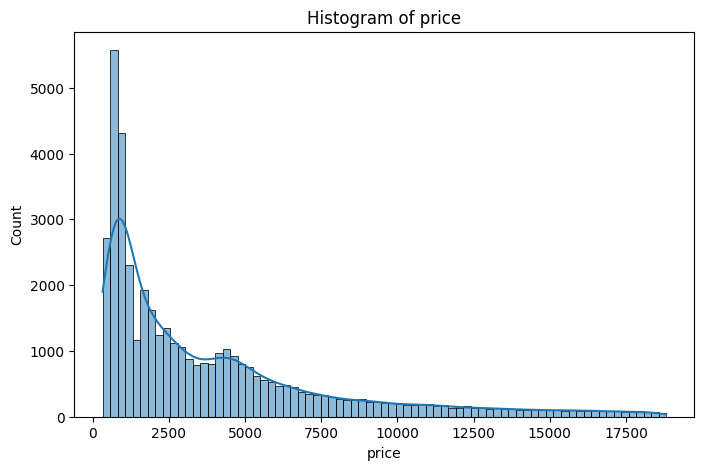

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='price', kde=True)
plt.title(f"Histogram of {'price'}")
plt.show()

## x

**This column represent the dimensions of the diamond in length.**

In [35]:
# Let's see the describtion 
x_stats = train_df['x'].describe()
print("X Statistics:")
print(x_stats)
#we can notice that the min is 0

X Statistics:
count    43055.000000
mean         5.731555
std          1.120732
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64


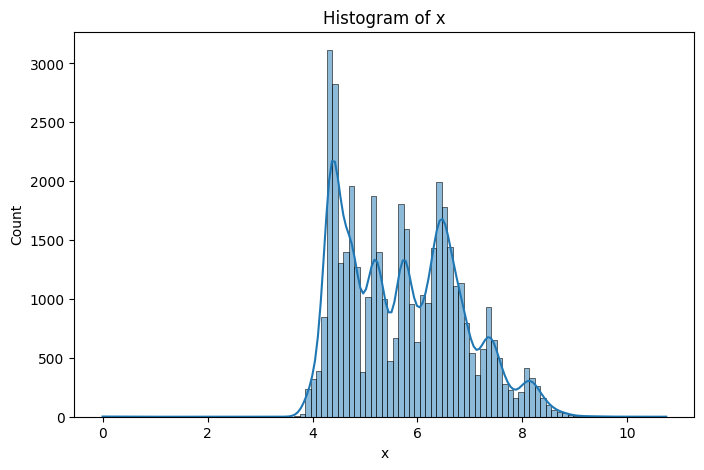

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='x', kde=True)
plt.title(f"Histogram of {'x'}")
plt.show()

## y

**This column represent the dimensions of the diamond in width.**

In [37]:
# Let's see the describtion 
y_stats = train_df['y'].describe()
print("Y Statistics:")
print(y_stats)
#we can notice that the min is 0

Y Statistics:
count    43055.000000
mean         5.735063
std          1.148389
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64


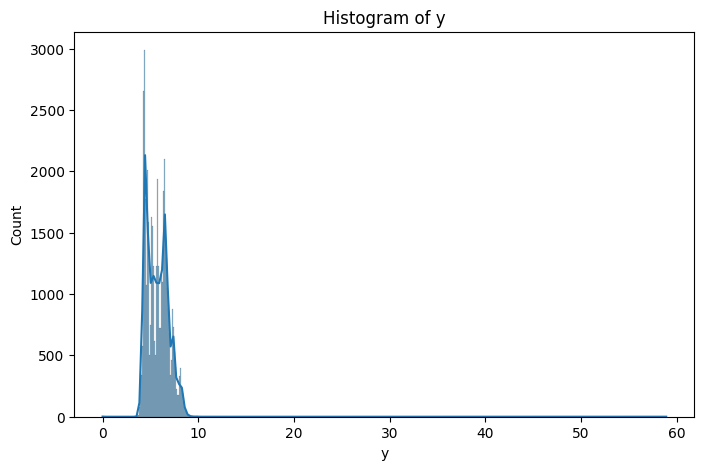

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

## z

**This column represent the dimensions of the diamond in depth.** 

In [39]:
# Let's see the describtion 
z_stats = train_df['z'].describe()
print("z Statistics:")
print(z_stats)
#we can notice that the min is 0

z Statistics:
count    43055.000000
mean         3.538528
std          0.707922
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64


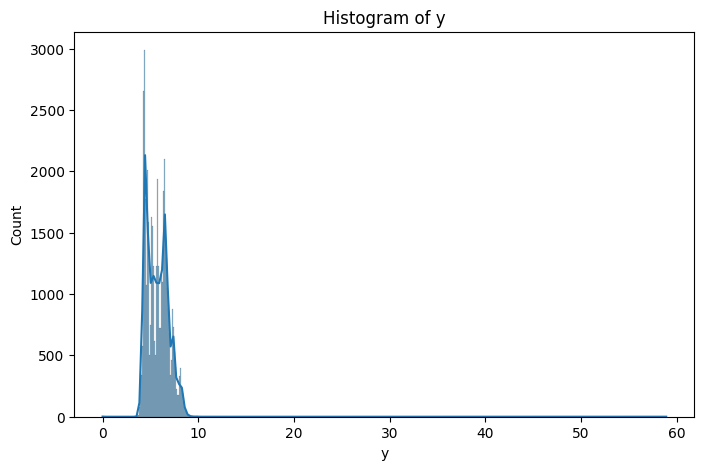

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

### Dealing with the 0 values in x, y, z

In [41]:
train_df = train_df[(train_df['x'] != 0) & (train_df['y'] != 0) & (train_df['z'] != 0)]

In [42]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000
mean,0.797475,61.746582,57.459375,3928.189112,5.731744,5.735116,3.539926
std,0.472928,1.434702,2.233822,3982.731057,1.118784,1.146848,0.704559
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.750000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Visualization

<Axes: >

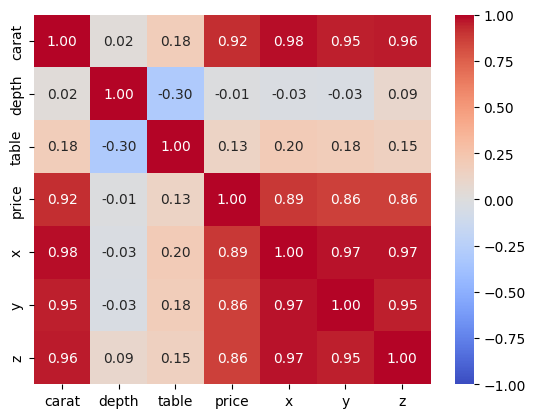

In [43]:
# plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f")

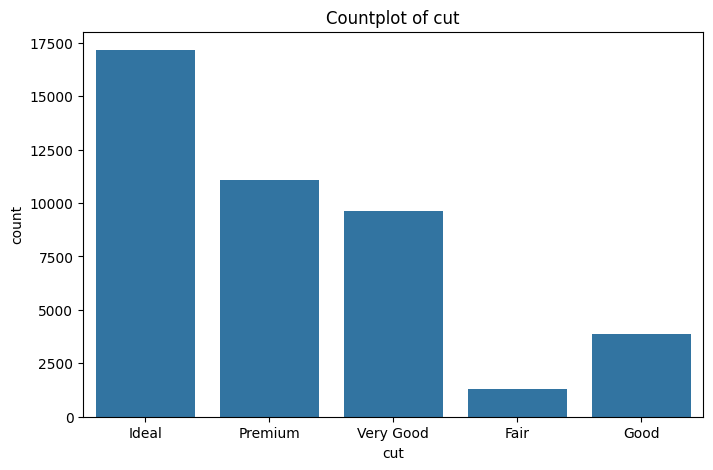

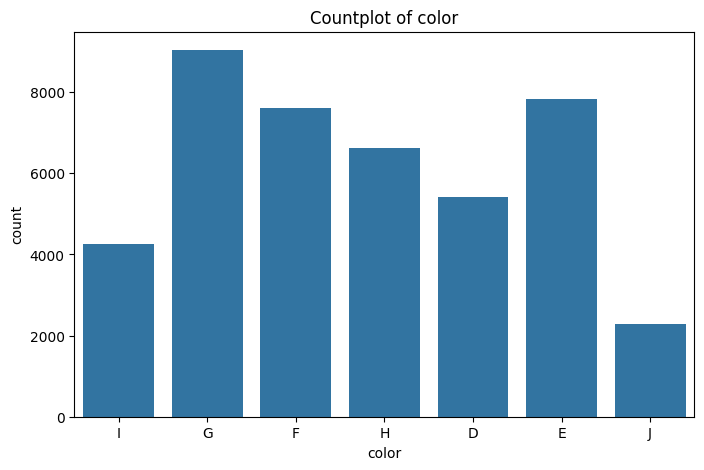

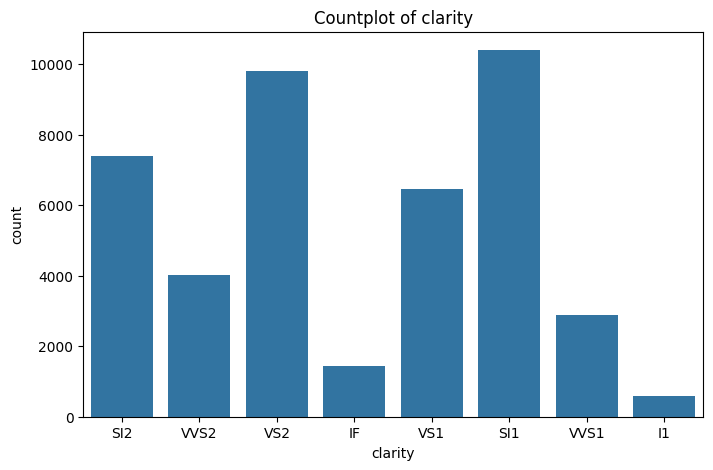

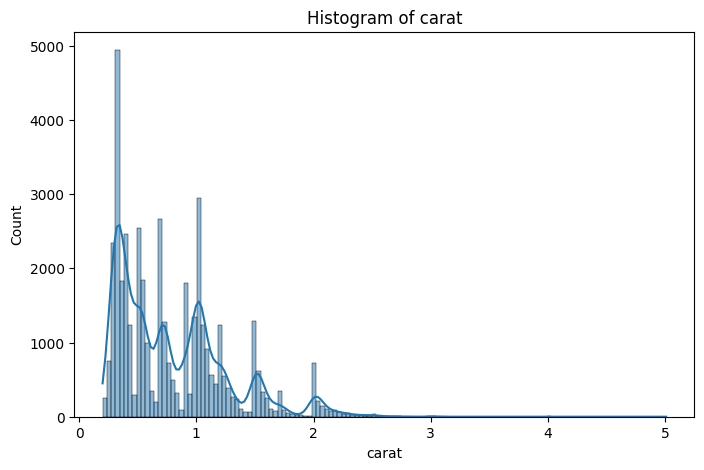

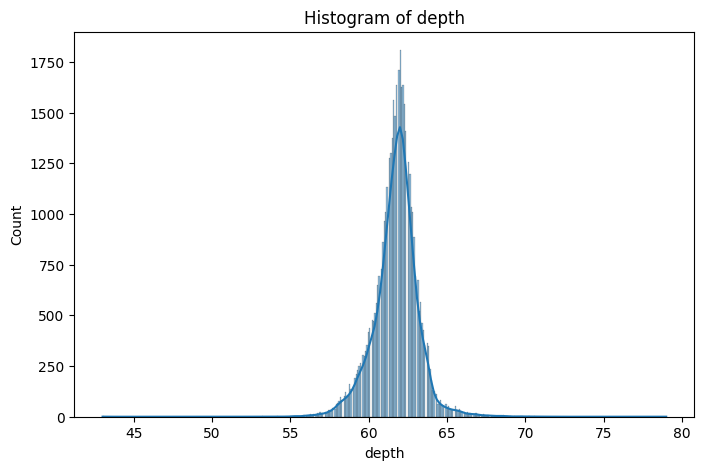

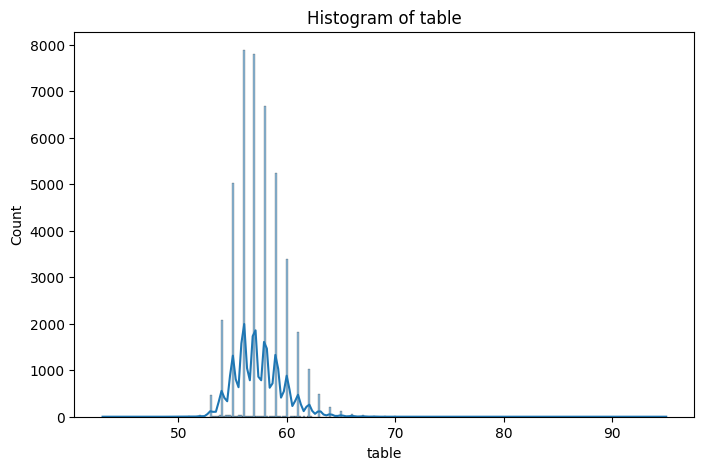

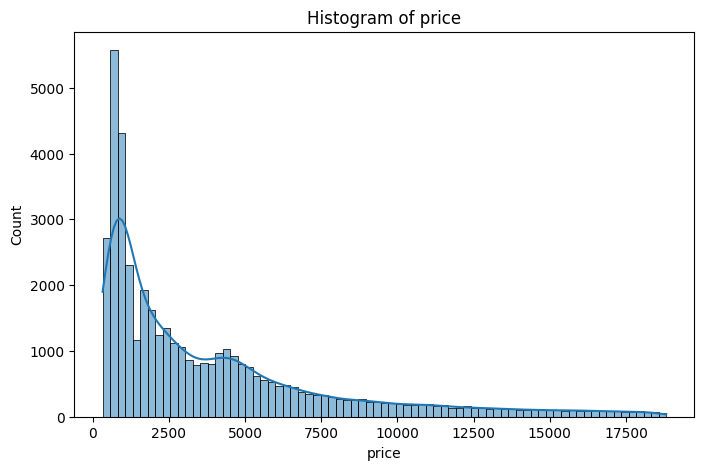

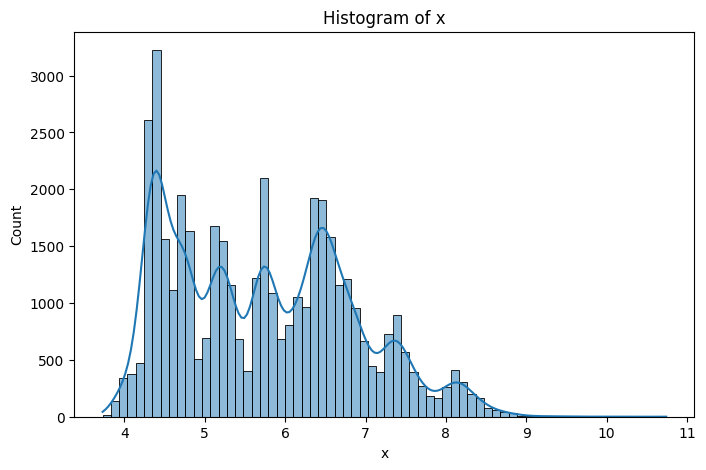

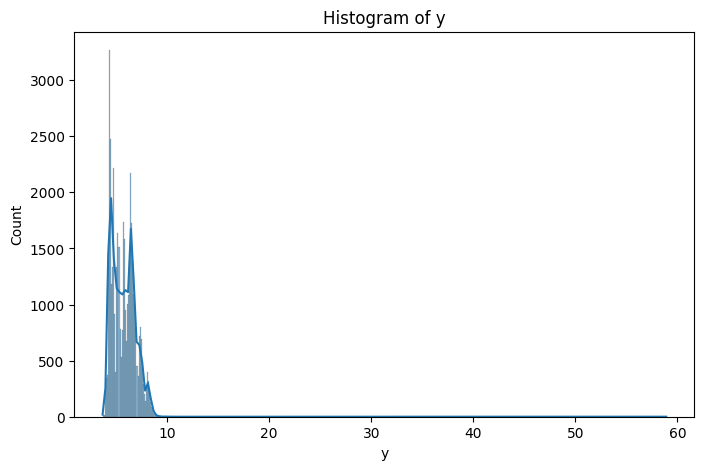

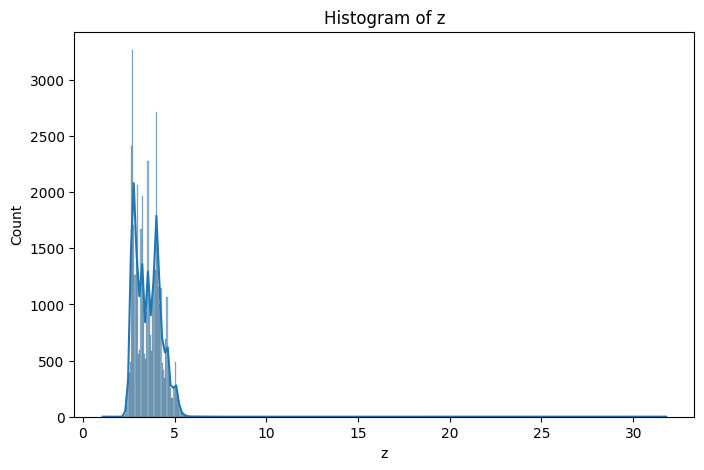

In [45]:
# Select columns for visualization
columns_to_visualize = ['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Plot categorical columns
for column in ['cut', 'color', 'clarity']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=column)
    plt.title(f"Countplot of {column}")
    plt.show()

# Plot numerical columns
for column in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

## Checking for outliers

Number of outliers in carat: 1487


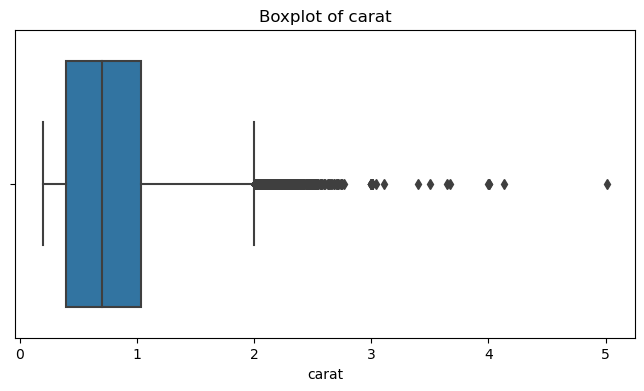

Number of outliers in depth: 2042


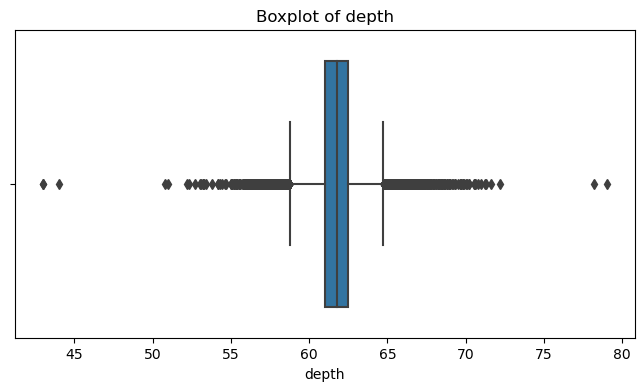

Number of outliers in table: 471


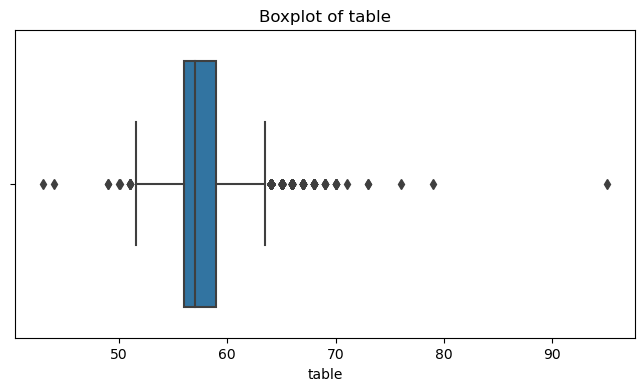

Number of outliers in price: 2830


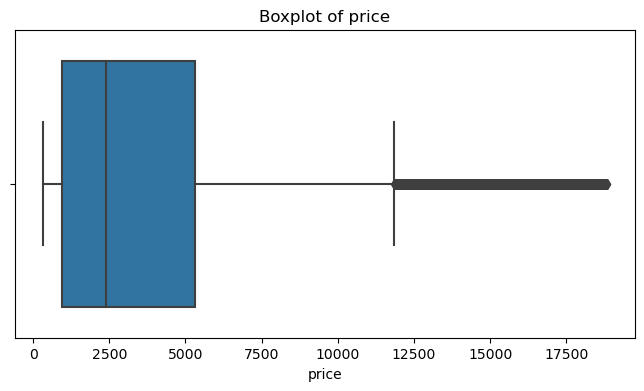

Number of outliers in x: 16


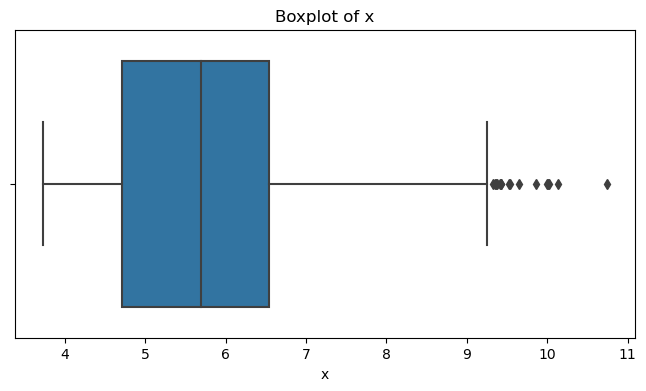

Number of outliers in y: 15


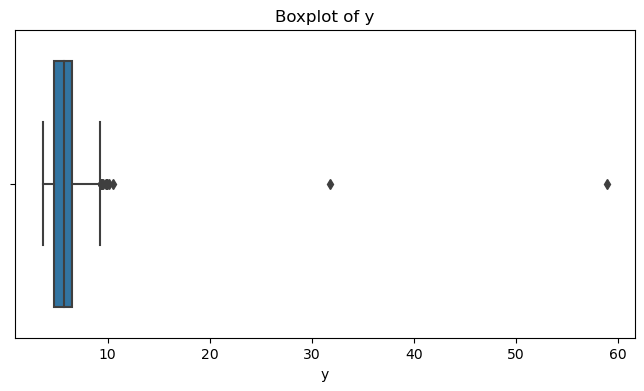

Number of outliers in z: 22


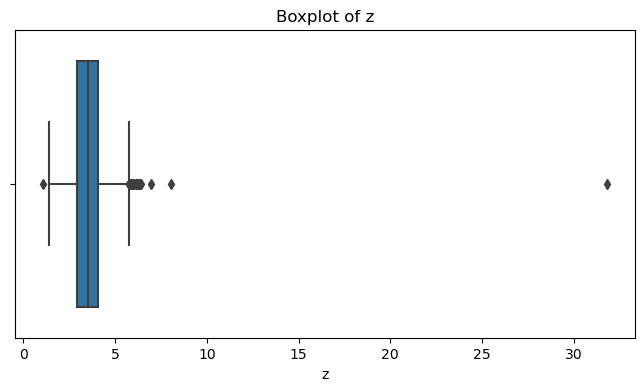

In [42]:
# Define a list of columns to check for outliers
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Detect and visualize outliers for each column
for column in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = train_df[(train_df[column] < lower_threshold) | (train_df[column] > upper_threshold)]

    # Print the number of outliers
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Create a boxplot to visualize the distribution and outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

## Dealing with outliers

In [46]:
#Let's drop the outliers 
train_df=train_df[(train_df["depth"]<65)&(train_df["depth"]>55)]
train_df=train_df[(train_df["table"]<65)&(train_df["table"]>50)]
train_df=train_df[(train_df["carat"]<3)]
train_df=train_df[(train_df["x"]<10)]
train_df=train_df[(train_df["y"])<10]
train_df=train_df[(train_df["z"]<5)&(train_df["z"]>2)]
train_df.shape

(40923, 10)

**Let's check the columns after deleting the outliers**

Number of outliers in carat: 484


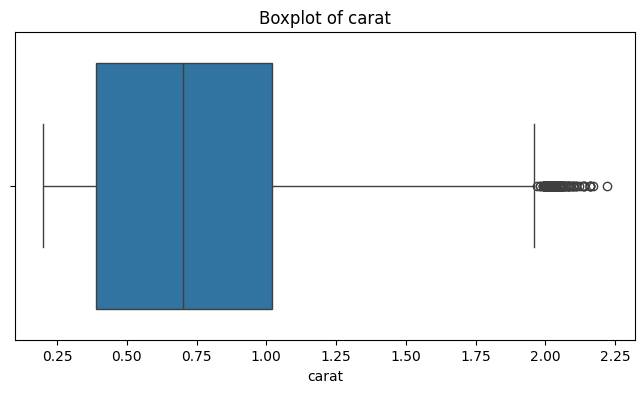

Number of outliers in depth: 1188


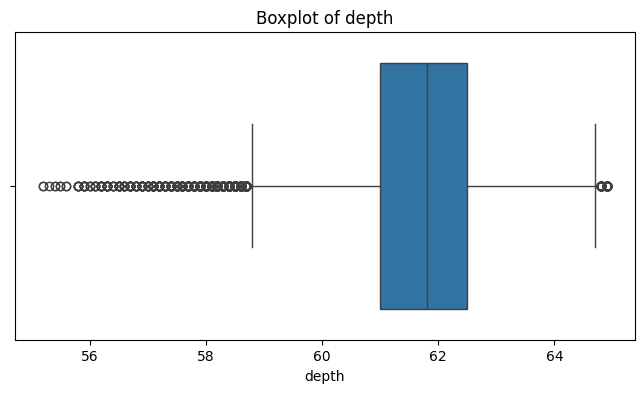

Number of outliers in table: 197


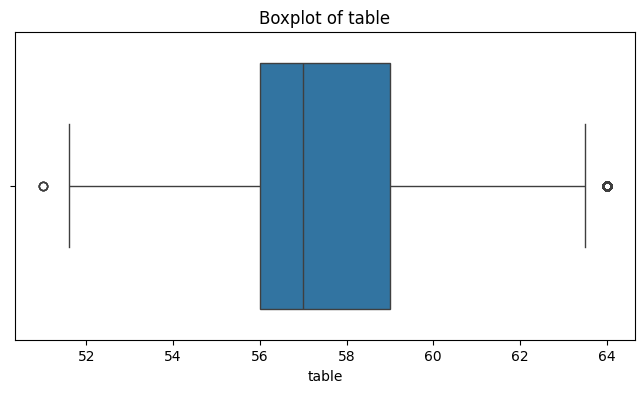

Number of outliers in price: 2145


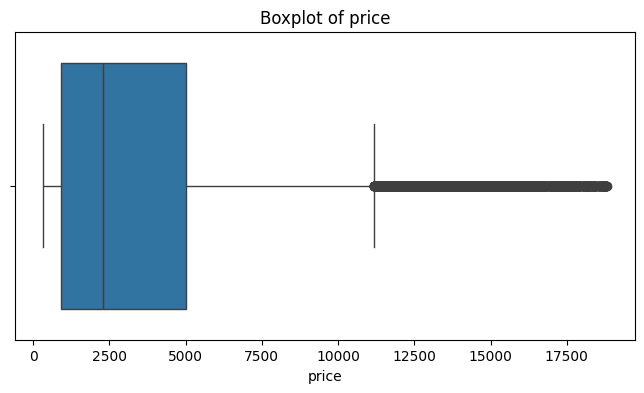

Number of outliers in x: 0


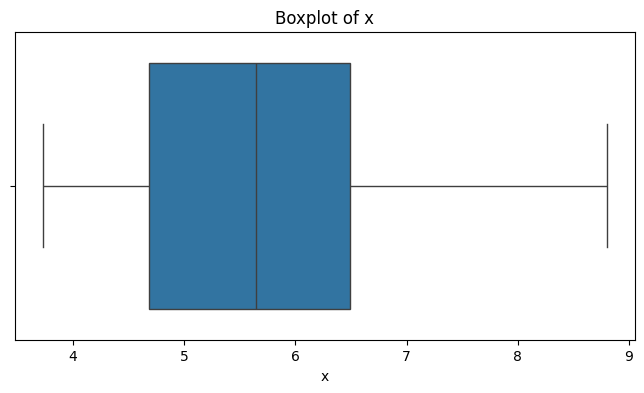

Number of outliers in y: 0


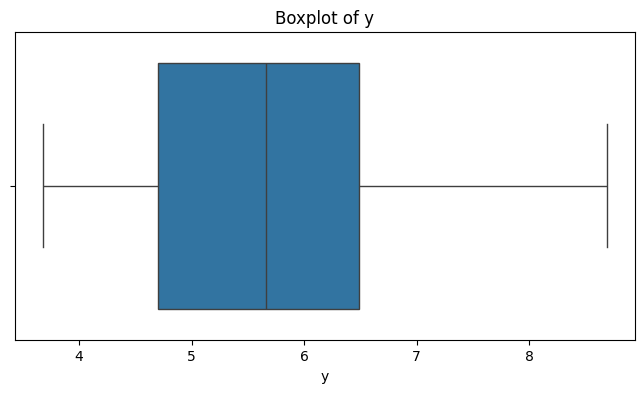

Number of outliers in z: 0


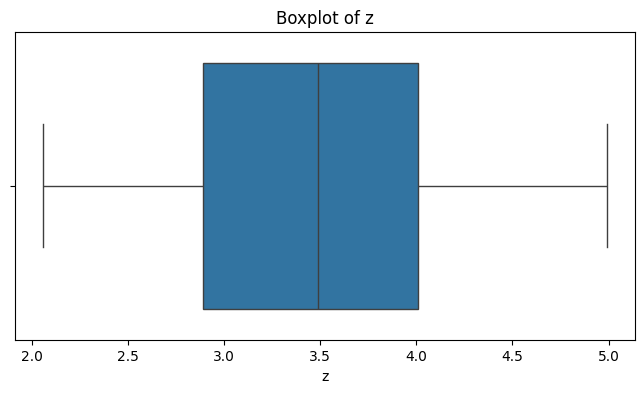

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define a list of columns to check for outliers
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Detect and visualize outliers for each column
for column in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = train_df[(train_df[column] < lower_threshold) | (train_df[column] > upper_threshold)]

    # Print the number of outliers
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Create a boxplot to visualize the distribution and outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

**As we can notice from the box plots, the outliers are deleted.**

## Categorical columns

In [48]:
# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)
#As we can see we have three categorical columns

Categorical Columns:
Index(['cut', 'color', 'clarity'], dtype='object')


In [49]:
train_df['clarity'].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

## Dealing with Categorical columns

**Listed below are the diamond color grades (from 'D' to 'J') in descending order of importance, with 'D' being the most important and 'J' being the least important:**

-D: Colorless
-E: Colorless
-F: Colorless
-G: Near Colorless
-H: Near Colorless
-I: Near Colorless
-J: Near Colorless

In [50]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = ['color','cut', 'clarity']

color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OrdinalEncoder(categories= [color,cut,clarity]),cat),remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [52]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['D', 'E', 'F', 'G',
                                                             'H', 'I', 'J'],
                                                            ['Ideal', 'Premium',
                                                             'Very Good',
                                                             'Good', 'Fair'],
                                                            ['IF', 'VVS1',
                                                             'VVS2', 'VS1',
                                                             'VS2', 'SI1',
                                                             'SI2', 'I1']]),
                                 ['color', 'cut', 'clarity'])],
                  verbose_feature_names_out=False)

## Dealing with numerical data

### Scaler

In [53]:
scaler = MinMaxScaler()

## Saving the cleaned data

In [54]:
train_df.to_csv('cleaned_train_df.csv', index=False)

In [55]:
pd.read_csv('cleaned_train_df.csv').head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
